In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
sys.path.append('/Users/barry/CodeAcademy/Ideal_dataset/coding/API/')

In [4]:
import numpy as np
import pandas as pd

from IdealDataInterface import IdealDataInterface

### Specify the folder where your sensor data is

In [5]:
folder_path = '../../sensordata'
ideal = IdealDataInterface(folder_path)

Found entries for 1592 sensor readings.


In [6]:
ideal.view().subtype.unique()

array(['hot-water-cold-pipe', 'gas', 'hot-water-hot-pipe',
       'central-heating-return', 'cooker', 'electric-combined',
       'central-heating-flow', 'mains', 'shower', 'oven', 'unlabelled',
       'heating', 'utility-room-sockets', 'induction-hob', 'water-heater',
       'sockets2', 'sockets1'], dtype=object)

We have 255 houses

In [7]:
communitity_df = ideal.view()

In [8]:
len(communitity_df.homeid.unique())

255

In [9]:
list_of_homeids = sorted(communitity_df.homeid.unique())

In [14]:
print(list_of_homeids)

['100', '101', '102', '105', '106', '107', '109', '110', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '128', '129', '133', '134', '135', '136', '137', '138', '139', '140', '141', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '197', '199', '200', '201', '202', '203', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '218', '219', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258'

### get a list of houses with the full set of sensors

### Data for one house

In [10]:
communitity_df.homeid = communitity_df.homeid.astype(int)

In [11]:
communitity_df.sort_values(by = 'homeid', ascending = True).head(1)

,homeid,roomid,room_type,category,subtype,sensorid
1215,47,650,kitchen,tempprobe,central-heating-flow,1190


### how many rooms per house

In [12]:
print(f'homeid: {house} rooms: {len(ideal.get(homeid = 82))}')

NameError: name 'house' is not defined

In [ ]:
ideal.view()

,homeid,roomid,room_type,category,subtype,sensorid
0,82,892,bathroom,tempprobe,hot-water-cold-pipe,3249
1,249,2306,hall,gas-pulse,gas,14905
2,308,2831,kitchen,tempprobe,hot-water-hot-pipe,19973
3,139,1315,kitchen,tempprobe,central-heating-return,6810
4,199,1854,kitchen,tempprobe,central-heating-return,11139
...,...,...,...,...,...,...
1587,93,984,bedroom,tempprobe,hot-water-hot-pipe,3922
1588,68,757,utility,electric-mains,electric-combined,2122c2126
1589,219,2020,kitchen,tempprobe,central-heating-flow,12547
1590,175,1638,bedroom,tempprobe,hot-water-hot-pipe,9522


In [ ]:
sensors_per_home = ideal.view().sort_values(by = 'homeid', ascending = True).groupby('homeid').count().roomid.reset_index()
sensors_per_home.columns = ['homeid', 'sensors_per_home']
display(sensors_per_home.sensors_per_home.value_counts().reset_index())


,sensors_per_home,count
0,6,202
1,8,21
2,5,15
3,9,9
4,7,6
5,10,1
6,4,1


### how many of each type of room

In [ ]:
total_sensors_per_room = ideal.view().groupby('room_type').count().homeid.reset_index()
total_sensors_per_room.columns = ['room_type', 'count']
total_sensors_per_room

,room_type,count
0,bathroom,29
1,bedroom,93
2,cupboard,12
3,diningroom,13
4,hall,440
5,kitchen,488
6,kitchenliving,30
7,livingroom,86
8,other,83
9,outside,128


In [ ]:
ideal.view()

,homeid,roomid,room_type,category,subtype,sensorid
0,82,892,bathroom,tempprobe,hot-water-cold-pipe,3249
1,249,2306,hall,gas-pulse,gas,14905
2,308,2831,kitchen,tempprobe,hot-water-hot-pipe,19973
3,139,1315,kitchen,tempprobe,central-heating-return,6810
4,199,1854,kitchen,tempprobe,central-heating-return,11139
...,...,...,...,...,...,...
1587,93,984,bedroom,tempprobe,hot-water-hot-pipe,3922
1588,68,757,utility,electric-mains,electric-combined,2122c2126
1589,219,2020,kitchen,tempprobe,central-heating-flow,12547
1590,175,1638,bedroom,tempprobe,hot-water-hot-pipe,9522


### ideal.get()  
When I run ideal.get() on a home id it returns a list.  
Each item in the list refers to a different room  
Each room is a dictionary containing these keys:  
['homeid', 'roomid', 'room_type', 'category', 'subtype', 'sensorid', 'readings']  
Where 'readings' is a Pandas series. if i .reset_index() it i can get it as a dataframe 

In [ ]:
view_homid_47 = ideal.view(homeid = 47)
view_homid_47

,homeid,roomid,room_type,category,subtype,sensorid
0,47,650,kitchen,tempprobe,hot-water-hot-pipe,1183
1,47,654,hall,gas-pulse,gas,1221
2,47,650,kitchen,tempprobe,central-heating-return,1189
3,47,654,hall,electric-mains,electric-combined,1216c1220
4,47,650,kitchen,tempprobe,central-heating-flow,1190
5,47,650,kitchen,tempprobe,hot-water-cold-pipe,1182


In [ ]:
homeid_47 = ideal.get(homeid = 47)

In [ ]:
homeid_47

[{'homeid': '47',
  'roomid': '650',
  'room_type': 'kitchen',
  'category': 'tempprobe',
  'subtype': 'hot-water-hot-pipe',
  'sensorid': '1183',
  'readings': time
  2016-08-10 09:25:46    283
  2016-08-10 09:25:58    283
  2016-08-10 09:26:10    283
  2016-08-10 09:26:22    283
  2016-08-10 09:26:34    283
                        ... 
  2017-05-08 16:09:41    190
  2017-05-08 16:09:53    190
  2017-05-08 16:10:05    190
  2017-05-08 16:10:17    190
  2017-05-08 16:10:29    190
  Name: hot-water-hot-pipe, Length: 1880458, dtype: int64},
 {'homeid': '47',
  'roomid': '654',
  'room_type': 'hall',
  'category': 'gas-pulse',
  'subtype': 'gas',
  'sensorid': '1221',
  'readings': time
  2016-09-20 08:08:46    112
  2016-09-20 08:09:05    112
  2016-09-20 16:25:27    112
  2016-09-20 17:20:04    112
  2016-09-20 17:22:10    112
                        ... 
  2017-05-08 18:38:23    112
  2017-05-08 18:38:58    112
  2017-05-08 18:39:16    112
  2017-05-08 18:43:34    112
  2017-05-08 18:5

In [ ]:
print(homeid_47)

[{'homeid': '47', 'roomid': '650', 'room_type': 'kitchen', 'category': 'tempprobe', 'subtype': 'hot-water-hot-pipe', 'sensorid': '1183', 'readings': time
2016-08-10 09:25:46    283
2016-08-10 09:25:58    283
2016-08-10 09:26:10    283
2016-08-10 09:26:22    283
2016-08-10 09:26:34    283
                      ... 
2017-05-08 16:09:41    190
2017-05-08 16:09:53    190
2017-05-08 16:10:05    190
2017-05-08 16:10:17    190
2017-05-08 16:10:29    190
Name: hot-water-hot-pipe, Length: 1880458, dtype: int64}, {'homeid': '47', 'roomid': '654', 'room_type': 'hall', 'category': 'gas-pulse', 'subtype': 'gas', 'sensorid': '1221', 'readings': time
2016-09-20 08:08:46    112
2016-09-20 08:09:05    112
2016-09-20 16:25:27    112
2016-09-20 17:20:04    112
2016-09-20 17:22:10    112
                      ... 
2017-05-08 18:38:23    112
2017-05-08 18:38:58    112
2017-05-08 18:39:16    112
2017-05-08 18:43:34    112
2017-05-08 18:50:58    112
Name: gas, Length: 36809, dtype: int64}, {'homeid': '47', '

In [ ]:
print(type(homeid_47))

<class 'list'>


In [ ]:
print(len(homeid_47))

6


In [ ]:
print(homeid_47[0].keys())

dict_keys(['homeid', 'roomid', 'room_type', 'category', 'subtype', 'sensorid', 'readings'])


In [ ]:
print(homeid_47[0]['homeid'])

47


In [ ]:
print(homeid_47[0]['roomid'])

650


In [ ]:
print(homeid_47[0]['room_type'])

kitchen


In [ ]:
print(homeid_47[0]['category'])

tempprobe


In [ ]:
print(homeid_47[0]['subtype'])

hot-water-hot-pipe


In [ ]:
print(homeid_82[0]['sensorid'])

3249


In [ ]:
print(homeid_82[0]['readings'].reset_index())

                       time  hot-water-cold-pipe
0       2016-10-25 14:39:38                  165
1       2016-10-25 14:39:50                  165
2       2016-10-25 14:40:02                  165
3       2017-01-30 13:46:16                  210
4       2017-01-30 13:46:28                  210
...                     ...                  ...
3000492 2018-06-30 23:58:46                  215
3000493 2018-06-30 23:58:58                  215
3000494 2018-06-30 23:59:10                  215
3000495 2018-06-30 23:59:22                  215
3000496 2018-06-30 23:59:46                  215

[3000497 rows x 2 columns]


In [ ]:
print(type(homeid_82[0]['readings']))

<class 'pandas.core.series.Series'>


### Which room types are available?

In [ ]:
ideal.view().sort_values(by = 'homeid', ascending = True).groupby('homeid').count().roomid.reset_index()

,homeid,roomid
0,100,6
1,101,6
2,102,6
3,105,7
4,106,9
...,...,...
250,94,5
251,96,8
252,97,6
253,98,5


### What categories are available?

In [ ]:
ideal.categories()

,category,subtype
0,tempprobe,hot-water-cold-pipe
1,gas-pulse,gas
2,tempprobe,hot-water-hot-pipe
3,tempprobe,central-heating-return
4,electric-subcircuit,cooker
5,electric-mains,electric-combined
6,tempprobe,central-heating-flow
7,electric-subcircuit,mains
8,electric-subcircuit,shower
9,electric-subcircuit,oven


### Search for some sensors

In [ ]:
ideal.view(homeid=105)

,homeid,roomid,room_type,category,subtype,sensorid
0,105,1110,kitchen,tempprobe,central-heating-return,5075
1,105,1110,kitchen,gas-pulse,gas,5084
2,105,1126,utility,electric-subcircuit,mains,5276
3,105,1110,kitchen,tempprobe,central-heating-flow,5076
4,105,1110,kitchen,tempprobe,hot-water-hot-pipe,5083
5,105,1111,hall,electric-mains,electric-combined,5093c5097
6,105,1110,kitchen,tempprobe,hot-water-cold-pipe,5082


In [ ]:
ideal.view(homeid=105, subtype='hot-water-hot-pipe')

,homeid,roomid,room_type,category,subtype,sensorid
0,105,1110,kitchen,tempprobe,hot-water-hot-pipe,5083


In [ ]:
ideal.view(homeid=105, subtype='hot-water-cold-pipe')

,homeid,roomid,room_type,category,subtype,sensorid
0,105,1110,kitchen,tempprobe,hot-water-cold-pipe,5082


In [ ]:
data = ideal.get(sensorid=[5083, 5082])

len(data)

2

In [ ]:
# Each item in data is a dictionary
data[0].keys()

dict_keys(['homeid', 'roomid', 'room_type', 'category', 'subtype', 'sensorid', 'readings'])

### Resample the temperature readings and combine them in one DataFrame

In [ ]:
print(data[0]['subtype'])
print(data[1]['subtype'])

hot-water-hot-pipe
hot-water-cold-pipe


In [ ]:
assert data[0]['subtype'] == 'hot-water-hot-pipe'

ts_hot_water = data[1]['readings']
ts_hot_water_cold_pipe = data[0]['readings']

In [ ]:
ts_hot_water = ts_hot_water.resample('5min').mean()
ts_hot_water_cold_pipe = ts_hot_water_cold_pipe.resample('5min').mean()

In [ ]:
ts_combined = pd.concat([ts_hot_water, ts_hot_water_cold_pipe], axis=1)

ts_combined /= 10

ts_combined.head()

,hot-water-cold-pipe,hot-water-hot-pipe
time,,
2017-04-25 13:10:00,23.000000,28.777778
2017-04-25 13:15:00,22.695000,28.184211
2017-04-25 13:20:00,22.370833,27.645833
2017-04-25 13:25:00,19.620833,33.100000
2017-04-25 13:30:00,13.108333,47.825000


### Have a peek into how that looks

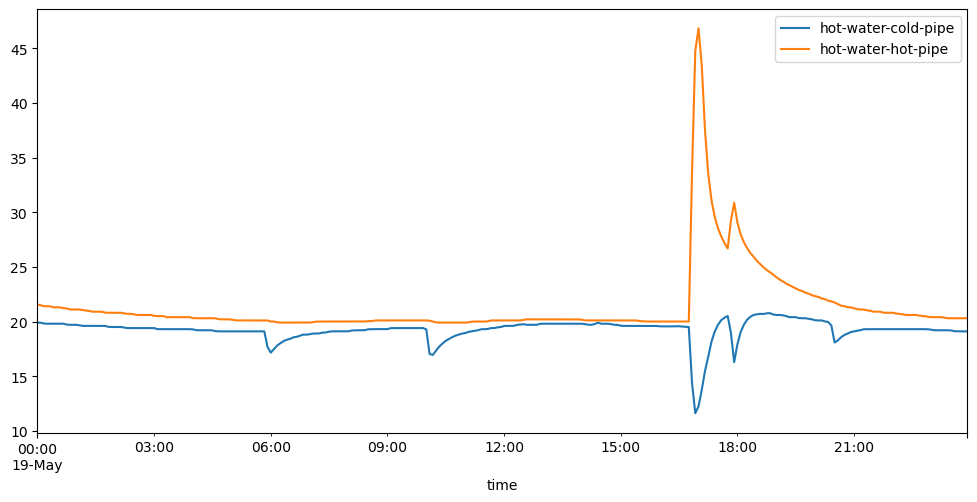

In [ ]:
fig, ax = plt.subplots(figsize=(12,5.5))

idx = (ts_combined.index >= '2017-05-19') & (ts_combined.index < '2017-05-20')

ts_combined[idx].plot(ax=ax);

### lets compare two houses electric-mains and plot it

In [ ]:
ideal.view(homeid=105, category='electric-mains')

,homeid,roomid,room_type,category,subtype,sensorid
0,105,1111,hall,electric-mains,electric-combined,5093c5097


In [ ]:
ideal.view(homeid=106, category='electric-mains')

,homeid,roomid,room_type,category,subtype,sensorid
0,106,1086,hall,electric-mains,electric-combined,4891c4895


In [ ]:
data = ideal.get(sensorid=['5093c5097', '4891c4895'])
print(len(data))



2


In [ ]:
mains_105 = data[0]['readings']
mains_106 = data[1]['readings']

In [ ]:
mains_105 = mains_105.resample('10min').mean()
mains_106 = mains_106.resample('10min').mean()

In [ ]:
mains_combined = pd.concat([mains_105, mains_106], axis=1)


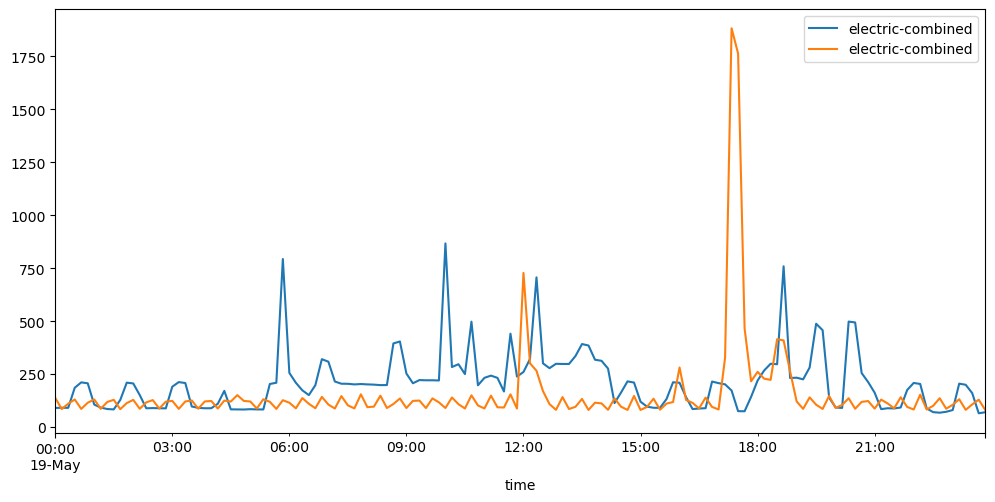

In [ ]:
fig, ax = plt.subplots(figsize=(12,5.5))

idx = (mains_combined.index >= '2017-05-19') & (mains_combined.index < '2017-05-20')

mains_combined[idx].plot(ax=ax);

### Lets have a look at 1 house and its electric-subcircuits

In [ ]:
ideal.view(category='electric-subcircuit', homeid = 106)

,homeid,roomid,room_type,category,subtype,sensorid
0,106,1130,utility,electric-subcircuit,shower,5312
1,106,1130,utility,electric-subcircuit,mains,5313
2,106,1130,utility,electric-subcircuit,cooker,13191


In [ ]:
electric_subcircuits_106 = ideal.view(category='electric-subcircuit', homeid = 106)[['subtype', 'sensorid']]
electric_subcircuits_106


,subtype,sensorid
0,shower,5312
1,mains,5313
2,cooker,13191


In [ ]:
data = ideal.get(sensorid= electric_subcircuits_106.sensorid.tolist())


In [ ]:
print(len(data))

3


In [ ]:
shower_106 = data[0]['readings'].resample('30min').mean()
mains_106 = data[1]['readings'].resample('30min').mean()
cooker_106 = data[2]['readings'].resample('30min').mean()

In [ ]:
combined_106 = pd.concat([shower_106, mains_106, cooker_106], axis=1)

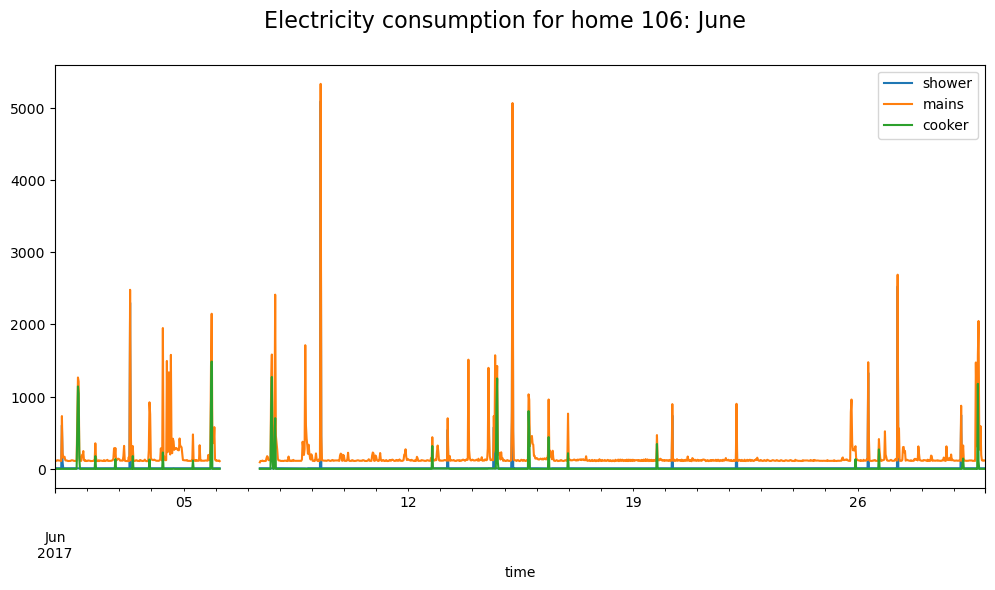

In [ ]:
fig, ax = plt.subplots(figsize=(12,5.5))

idx = (combined_106.index >= '2017-06-01') & (combined_106.index < '2017-06-30')
fig.suptitle('Electricity consumption for home 106: June', fontsize=16)
combined_106[idx].plot(ax=ax);